# TMDB Box Office Prediction
>
> This Notebook was created as part of Machine Learning in Finance lectured at Seoultech University.
>
> The dataset used for this project can be found [here](https://www.kaggle.com/c/tmdb-box-office-prediction) on the Kaggle Website.

---



In [63]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

# 1. Data Curation

## Load Data

In [64]:
# Directory containing the csv files
dir_path = 'data'

# Load the data
train = pd.read_csv(f"{dir_path}/tmdb.csv")

> This dataset was used in a Kaggle competition from February 7th to May 31st in 2019.
> The target of the competition was to predict a movies revenue with only given information on the release date.
> The competition was hosted by Kaggle and a total of 1,615 people participated.

The target value `y` of my project will be `revenue`.
  - In the case of movies the most important feature has to be the amount of money the movie can gross after its release.
  - As most of the production companies have to generate profit in order to keep existing, movie-revenue has a high relevance.

All of the other columns will act as features `X` to predict `y`.

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [66]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1600195,en,Lolita,Anna (Marceau) is a wife and mother who has an...,NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Deadfall,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '5391990d0e0a260fb5001629', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [67]:
# Check for missing values
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Blunt Observations

- There are **5 quantitative** and **18 qualitative** features in the dataset, one of them being the target value `revenue`.
- Out of the quantitative features the following are multi-value features:
  - `belongs_to_collection, geres, production_companies, production_countries, spoken_languages, Keywords, cast, crew`
- There are a lot of missing values for `belongs_to_collection` which likely means those are standalone movies without a collection and they can be later on corrected.
- `homepage` has also a lot of missing values which likely means the movie did not have a website for marketing. This can also be corrected later on.
- For the missing values in `overview, poster_path, production_companies, production_countries, runtime, spoken_languages, tagline, Keywords, cast, crew` we can assume that nobody was able to provide the missing values. The qualitative values are most likely not that relevant. The quantitative ones can be filled in with the median of the column.

## Fill-in Missing Data

For the numerical columns we can easily fill in missing values by finding the median of the columns.

In [68]:
# Fill missing values in columns with either float or int data types with the median of those columns
num_cols = train.select_dtypes(include=[np.number])
train[num_cols.columns] = num_cols.apply(lambda x: x.fillna(x.median()))

# Verify that there are no missing values left in numeric columns
print(train[num_cols.columns].isna().sum())

id            0
budget        0
popularity    0
runtime       0
revenue       0
dtype: int64


For the moment the missing values in the qualitative columns will be left as is. In the feature engineering those values will get transformed in a meaningful way.

## Expectations

### Budget

- Among the quantitative features, I anticipate the highest correlation between `budget` and `revenue`.
  - From a production company's ex-ante perspective:
    - Allocating a substantial `budget` is often done with the expectation of achieving significant `revenue`.
  - From the model's ex-post perspective:
    - Observing high `revenue` may indicate that a significant `budget` was invested initially.

> Notably, studies have found a positive correlation between `budget` and gross `revenue`, with [one analysis](https://www.ijbmer.com/docs/volumes/vol9issue3/ijbmer2018090303.pdf) reporting a correlation coefficient of 0.74. This paper also states a positive correlation of 0.26 between `runtime` and gross `revenue`. I expect to see similar correlations in my dataset.

### Runtime

- Knowing the domain, a positive correlation exists between a movie's `budget` and its `runtime`. Higher budgets often allow for longer runtimes due to increased resources for production and editing. This implicitly provides information about the `revenue`.
  - From a production company's ex-ante perspective:
    - Allocating larger `budgets` with the expectation that a longer `runtime` will enhance storytelling and audience engagement, potentially leading to higher `revenues`.
  - From the model's ex-post perspective:
    - Observing a longer `runtime` often indicates that a significant `budget` was invested, as more extensive content typically requires greater financial resources.

### Popularity

- Pre-release `popularity` significantly influences a movie's box office `revenue`. 
  - Highly anticipated films often achieve greater financial success due to increased audience interest. This anticipation is frequently amplified by substantial marketing efforts, which are typically funded by larger `budgets`.

### Collection

- Belonging to a well-established movie franchise significantly influences a film's box office `revenue`. Several franchises exemplified this trend:
  - [**Harry Potter Series:**](https://en.wikipedia.org/wiki/Wizarding_World#Box_office_performance) The eight films released from 2001 to 2011 collectively grossed over $7.7 billion worldwide, averaging nearly $1 billion per film. 
  - [**The Lord of the Rings Trilogy:**](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings_(film_series)#Box_office) Released between 2001 and 2003, this trilogy amassed approximately $2.9 billion globally, with each installment earning nearly $1 billion on average.
- Movies associated with established franchises often benefit from pre-existing fan bases, enhanced marketing leverage, and greater audience anticipation, all contributing to higher box office `revenues`.

### Production Company

- The `production company` behind a film significantly influences its box office revenue, particularly major studios that can allocate substantial budgets for production and marketing. 
- These studios often dominate market share and have the resources to produce high-quality films with extensive promotional campaigns, leading to higher `revenues`.

### Cast and Crew

- The caliber and amount of a movie's `cast` and `crew`, along with the allocated `budget`, plays a pivotal role in its box office success.
- Investing in renowned actors and skilled production teams often necessitates higher `budgets` but can lead to increased `revenues`.

# 2. Exploratory Data Analysis

### Revenue (`y`-variable)

Let's take a look at the distribution of `revenue`.

In [69]:
train['revenue'].describe().apply(lambda x: f'{x:,.0f}')

count            3,000
mean        66,725,852
std        137,532,326
min                  1
25%          2,379,808
50%         16,807,068
75%         68,919,204
max      1,519,557,910
Name: revenue, dtype: object

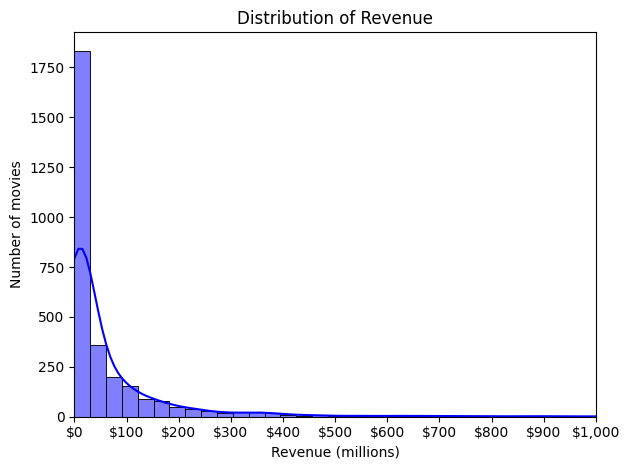

In [70]:
sns.histplot(train['revenue'], bins=50, kde=True, color='blue')
plt.xlabel('Revenue (millions)')
plt.xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000], ['$0', '$100', '$200', '$300', '$400', '$500', '$600', '$700', '$800', '$900', '$1,000'])
plt.xlim(0, 1000000000)
plt.ylabel('Number of movies')
plt.title('Distribution of Revenue')
plt.tight_layout()
plt.show()

The distribution of the revenue is heavily skewed to the right. Normalization of the datapoints with log can help increase the performance of the model.

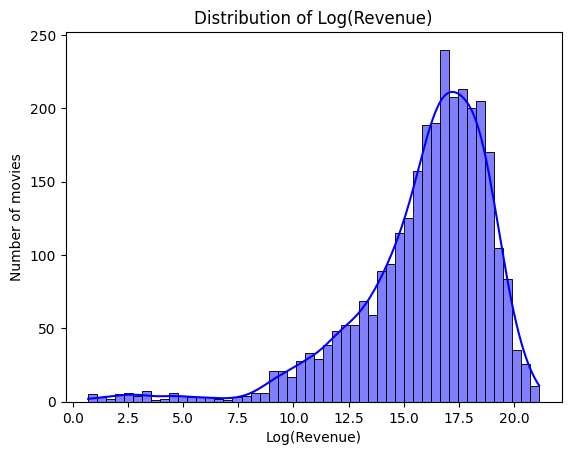

In [71]:
log_revenue = np.log1p(train['revenue'])
sns.histplot(log_revenue, bins=50, kde=True, color='blue')
plt.xlabel('Log(Revenue)')
plt.ylabel('Number of movies')
plt.title('Distribution of Log(Revenue)')
plt.show()

Taking the logarithm of the revenue lead to a more normal distribution, stabilized variance, and provide coefficients that are easier to interpret in multiplicative terms. These advantages can improve the accuracy and interpretability of the revenue forecasting model.

### Budget, Runtime, Popularity

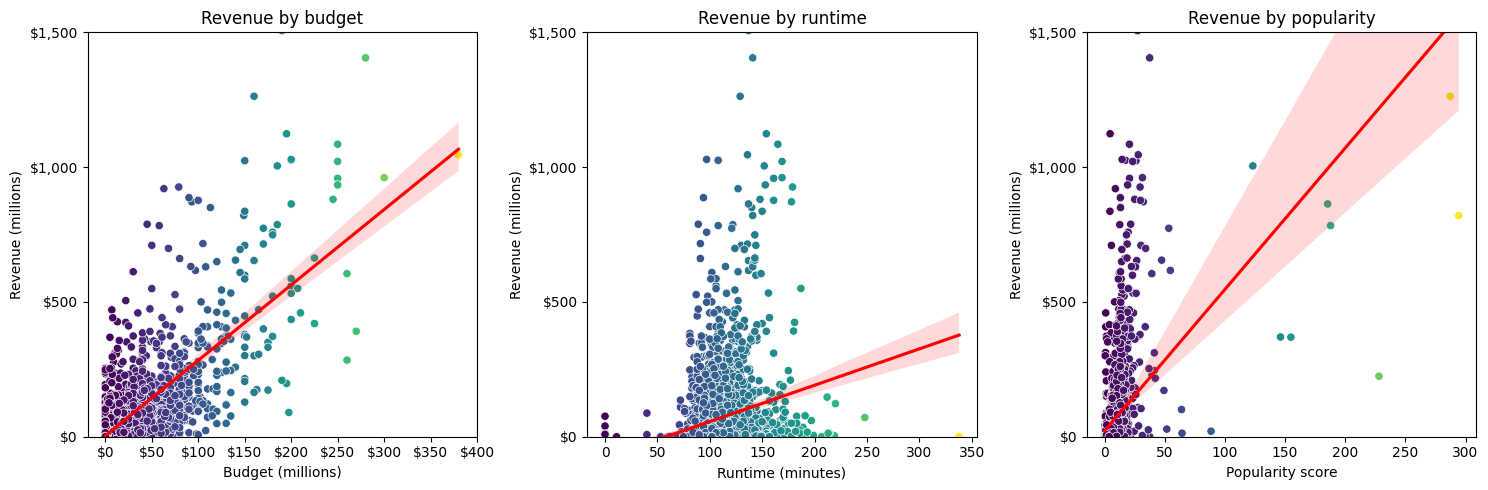

In [72]:
# Budget
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=train.iloc[:3000], x='budget', y='revenue', hue='budget', palette='viridis')
sns.regplot(data=train.iloc[:3000], x='budget', y='revenue', scatter=False, color='red')
plt.xticks([0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000], ['$0', '$50', '$100', '$150', '$200', '$250', '$300', '$350', '$400'])
plt.ylim(0, 1500000000)
plt.yticks([0, 500000000, 1000000000, 1500000000], ['$0', '$500', '$1,000', '$1,500'])
plt.title('Revenue by budget')
plt.xlabel('Budget (millions)')
plt.ylabel('Revenue (millions)')
plt.legend().remove()

# Runtime
plt.subplot(1, 3, 2)
sns.scatterplot(data=train.iloc[:3000], x='runtime', y='revenue', hue='runtime', palette='viridis')
sns.regplot(data=train.iloc[:3000], x='runtime', y='revenue', scatter=False, color='red')
plt.ylim(0, 1500000000)
plt.yticks([0, 500000000, 1000000000, 1500000000], ['$0', '$500', '$1,000', '$1,500'])
plt.title('Revenue by runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (millions)')
plt.legend().remove()

# Popularity
plt.subplot(1, 3, 3)
sns.scatterplot(data=train.iloc[:3000], x='popularity', y='revenue', hue='popularity', palette='viridis')
sns.regplot(data=train.iloc[:3000], x='popularity', y='revenue', scatter=False, color='red')
plt.ylim(0, 1500000000)
plt.yticks([0, 500000000, 1000000000, 1500000000], ['$0', '$500', '$1,000', '$1,500'])
plt.title('Revenue by popularity')
plt.xlabel('Popularity score')
plt.ylabel('Revenue (millions)')
plt.legend().remove()

plt.tight_layout()
plt.show()

There are some clear trends visible that an increase in budget and popularity tends to lead to higher revenue. Runtime seems to show this trend as well, although not as strongly. Let's compare the correlations.

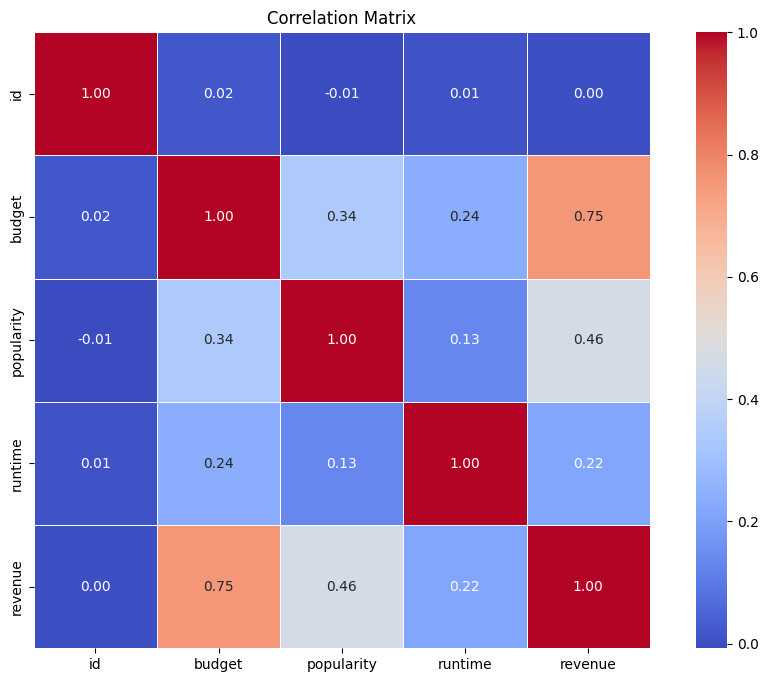

In [73]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Now it's very clear that `budget` and `popularity` have a high correlation with `revenue`, just as expected. The `runtime` seems to also have a fairly noticeable correlation.

### Feature Engineering

#### Collection

First I will transform the `belongs_to_collection` columns into two different ones. One binary one indicating wether a movie belongs to a collection and one containing only the main title of the collection.

In [74]:
# Extract collection names
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)[0]['name'] if pd.notna(x) and ast.literal_eval(x) else None)

# Change column to indicate whether a movie belongs to a collection or not
train['belongs_to_collection'] = train['belongs_to_collection'].apply(lambda x: 1 if pd.notna(x) else 0)
train[['collection_name', 'belongs_to_collection']].head()

,collection_name,belongs_to_collection
0,Hot Tub Time Machine Collection,1
1,The Princess Diaries Collection,1
2,None,0
3,None,0
4,None,0


Let's plot the results.

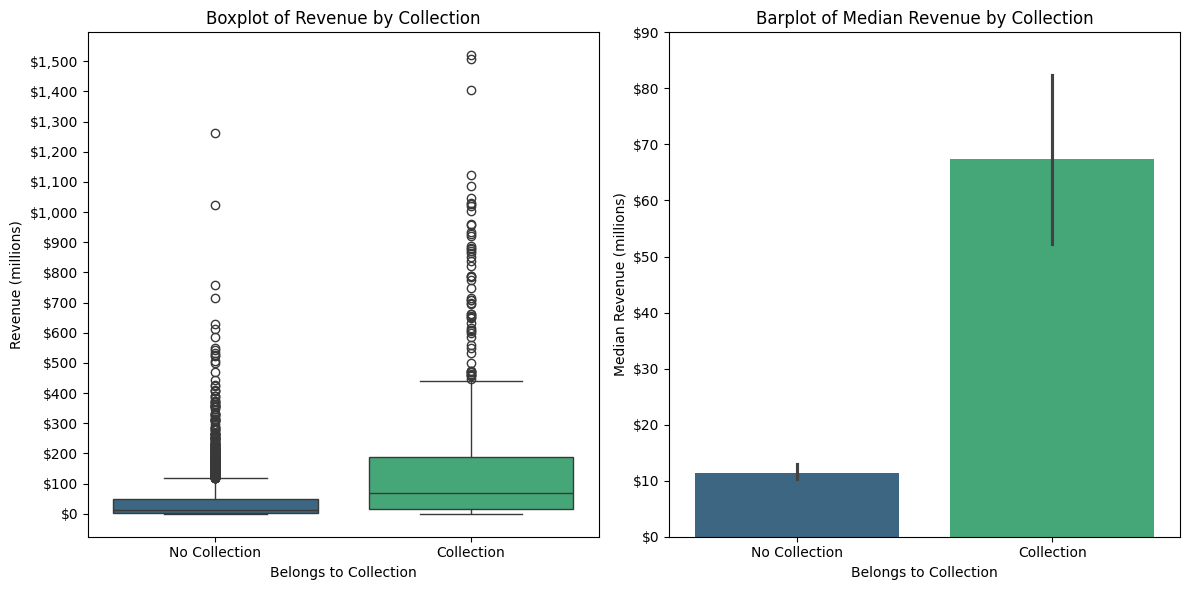

In [75]:
# Create subplots
plt.figure(figsize=(12, 6))

# Boxplot for revenue by belongs_to_collection
plt.subplot(1, 2, 1)
sns.boxplot(data=train, x='belongs_to_collection', y='revenue', hue='belongs_to_collection', palette='viridis')
plt.xticks([0, 1], ['No Collection', 'Collection'])
plt.xlabel('Belongs to Collection')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 100000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 100000000)])
plt.title('Boxplot of Revenue by Collection')
plt.legend().remove()

# Barplot for median revenue by belongs_to_collection
plt.subplot(1, 2, 2)
sns.barplot(data=train, x='belongs_to_collection', y='revenue', estimator=np.median, hue='belongs_to_collection', palette='viridis')
plt.xticks([0, 1], ['No Collection', 'Collection'])
plt.xlabel('Belongs to Collection')
plt.ylabel('Median Revenue (millions)')
plt.yticks(np.arange(0, 100000000, 10000000), [f'${x//1000000:,}' for x in np.arange(0, 100000000, 10000000)])
plt.title('Barplot of Median Revenue by Collection')
plt.legend().remove()

plt.tight_layout()
plt.show()

So we can see here that movies which belong to a collection seem to get higher revenues.

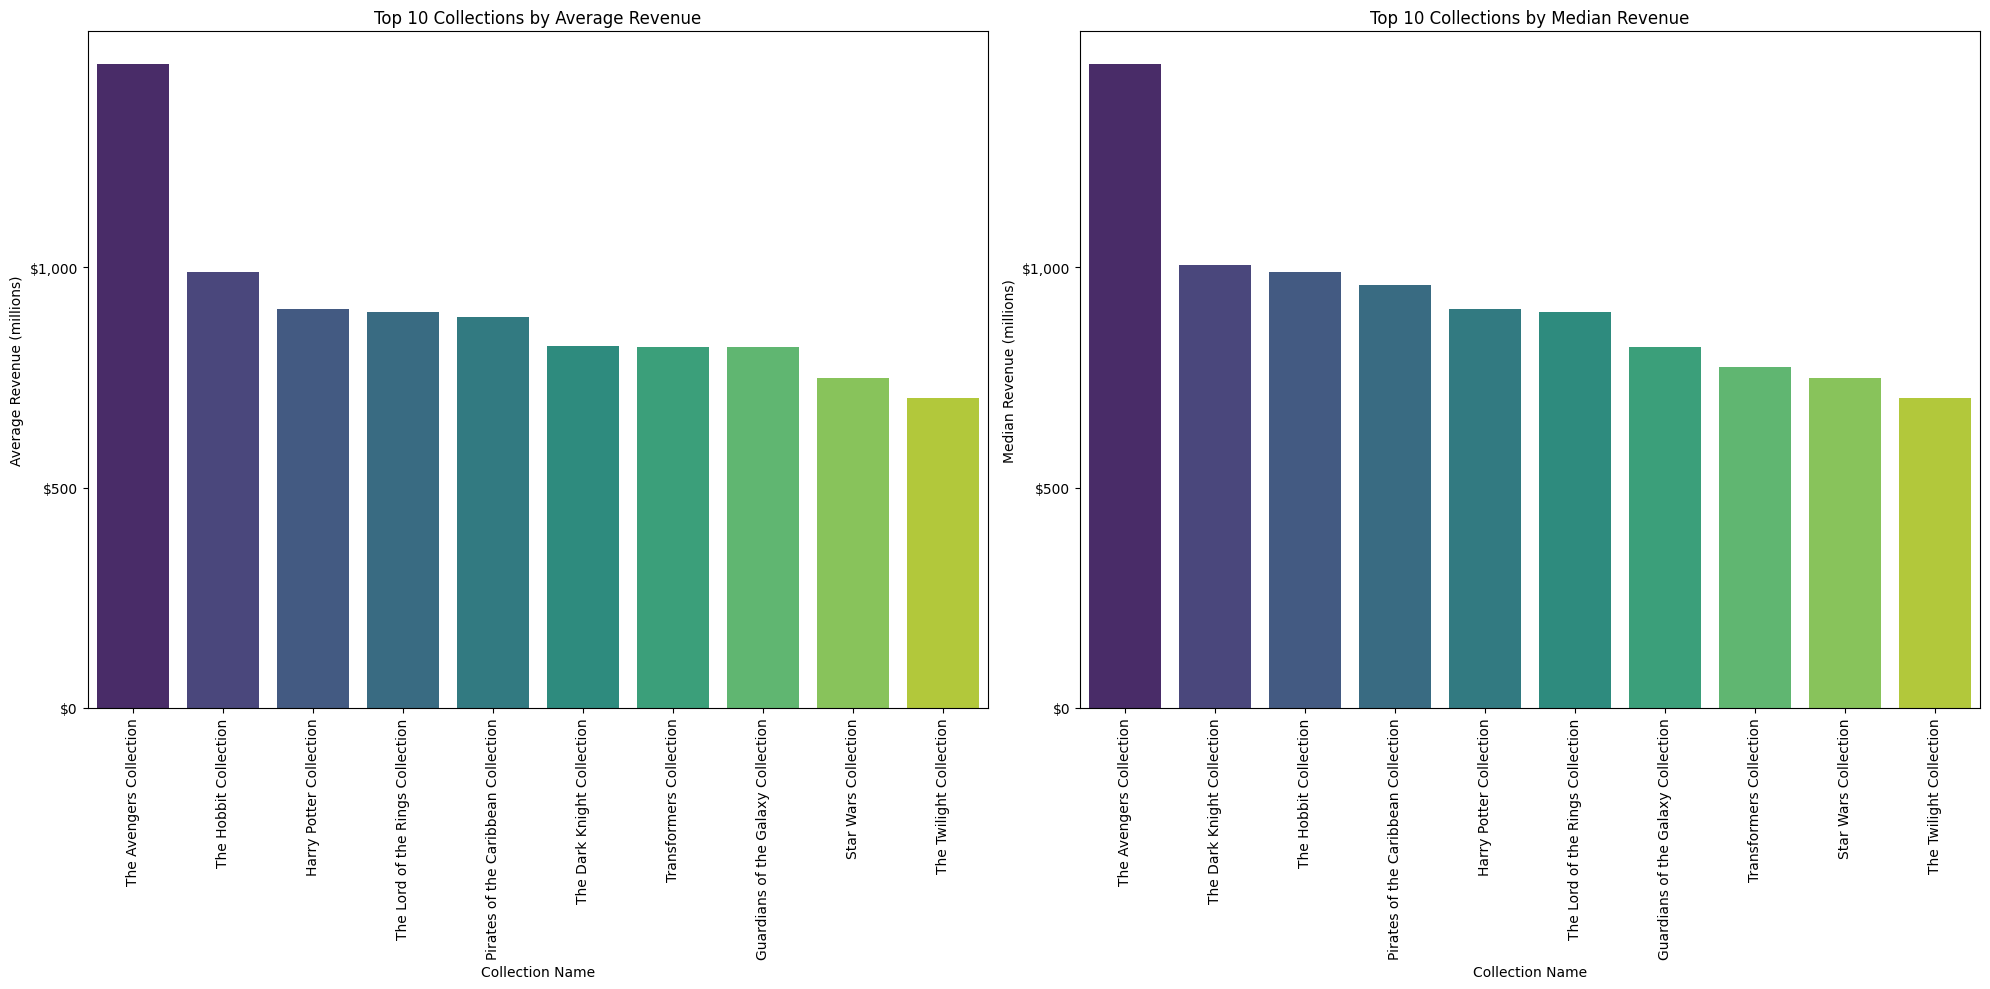

In [76]:
# Group by collection name, count occurrences, and sort
collection_counts = train['collection_name'].value_counts().reset_index()
collection_counts.columns = ['collection_name', 'movie_count']

# Filter out collections with no name and display the head
collection_counts = collection_counts[collection_counts['collection_name'].notna()]
collection_counts.head(10)

# Define valid collections
valid_collections = collection_counts[collection_counts['movie_count'] > 1]['collection_name']

# Group by collection_name and calculate the median revenue for valid collections
collection_median_revenue = train[train['collection_name'].isin(valid_collections)].groupby('collection_name')['revenue'].median().reset_index()

# Sort the collections by median revenue in descending order and select the top 10
collection_median_revenue = collection_median_revenue.sort_values(by='revenue', ascending=False).head(10)

# Calculate the average revenue for valid collections
collection_revenue = train[train['collection_name'].isin(valid_collections)].groupby('collection_name')['revenue'].mean().reset_index()

# Sort the collections by average revenue in descending order and select the top 10
collection_revenue = collection_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(20, 10))

# Average revenue plot
plt.subplot(1, 2, 1)
sns.barplot(data=collection_revenue, y='revenue', x='collection_name', hue='collection_name', palette='viridis')
plt.ylabel('Average Revenue (millions)')
plt.xlabel('Collection Name')
plt.title('Top 10 Collections by Average Revenue')
plt.yticks(np.arange(0, collection_revenue['revenue'].max(), step=500000000), [f'${int(x//1000000):,}' for x in np.arange(0, collection_revenue['revenue'].max(), step=500000000)])
plt.xticks(rotation=90)

# Median revenue plot
plt.subplot(1, 2, 2)
sns.barplot(data=collection_median_revenue, y='revenue', x='collection_name', hue='collection_name', palette='viridis')
plt.ylabel('Median Revenue (millions)')
plt.xlabel('Collection Name')
plt.title('Top 10 Collections by Median Revenue')
plt.yticks(np.arange(0, collection_median_revenue['revenue'].max(), step=500000000), [f'${int(x//1000000):,}' for x in np.arange(0, collection_median_revenue['revenue'].max(), step=500000000)])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Here we can see the collections with the highest revenues by average and median.

Let's take a look at the correlation of `belongs_to_collection` and the other numeric features.

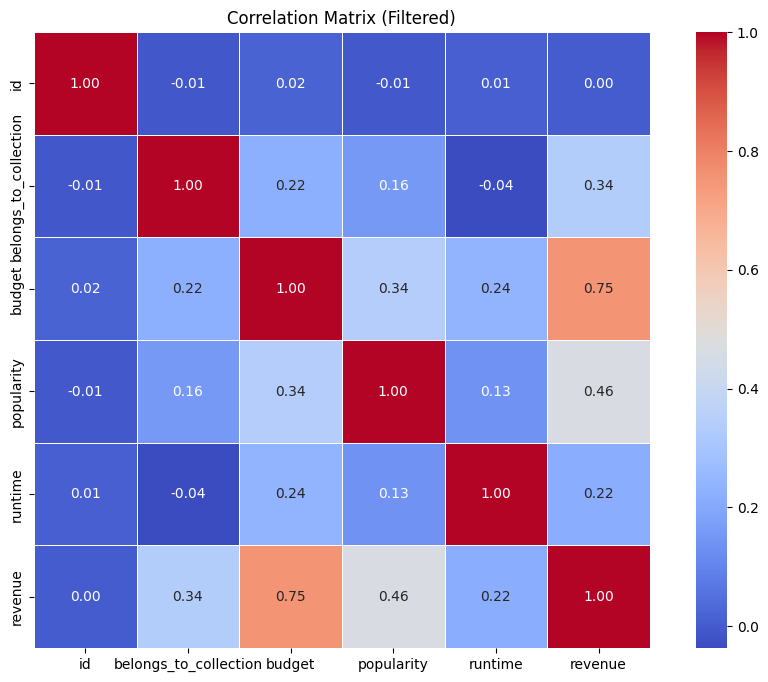

In [77]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix (Filtered)')
plt.show()

As expected we can observe a fairly high correlation between `belongs_to_collection` and `revenue`, even higher than `runtime`.

#### Production Company

For the production company I will use the first mentioned entry and assume that this is the main production company.

In [78]:
# Function to extract the first production company name and id
def extract_main_production_company_info(companies):
    try:
        company = ast.literal_eval(companies)[0]
        return company['name'], company['id']
    except (IndexError, ValueError, TypeError):
        return None, None

# Apply the function to the 'production_companies' column
train['main_prod_comp'], train['main_prod_comp_id'] = zip(*train['production_companies'].apply(extract_main_production_company_info))

# Display the first few rows to verify
train[['production_companies', 'main_prod_comp', 'main_prod_comp_id']].head()

,production_companies,main_prod_comp,main_prod_comp_id
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",Paramount Pictures,4.0
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",Walt Disney Pictures,2.0
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",Bold Films,2266.0
3,NaN,None,NaN
4,NaN,None,NaN


In [79]:
main_prod_comp_counts = train.groupby(['main_prod_comp', 'main_prod_comp_id']).size().reset_index(name='counts')
main_prod_comp_counts = main_prod_comp_counts.sort_values(by='counts', ascending=False)
main_prod_comp_counts.head(10)

,main_prod_comp,main_prod_comp_id,counts
977,Universal Pictures,33.0,167
706,Paramount Pictures,4.0,158
966,Twentieth Century Fox Film Corporation,306.0,122
210,Columbia Pictures,5.0,90
1006,Warner Bros.,6194.0,70
649,New Line Cinema,12.0,69
1004,Walt Disney Pictures,2.0,62
961,TriStar Pictures,559.0,44
211,Columbia Pictures Corporation,441.0,44
974,United Artists,60.0,41


It seems like within the data there are some variations of the same company name. 

For example:
- Columbia Pictures, 90
- Columbia Pictures Corporation, 44

In order to avoid treating the same entity as different ones and create more accurate results, they can be grouped into a single one.

In [80]:
# Dictionary of canonical company names
canonical_companies_mapping = {
    'Warner Bros.': 'Warner Bros',
    'Warner Bros. Pictures': 'Warner Bros',
    'Universal Pictures': 'Universal Pictures',
    'Universal Studios': 'Universal Pictures',
    'Twentieth Century Fox': 'Twentieth Century Fox',
    'Twentieth Century Fox Film Corporation':'Twentieth Century Fox',
    'Columbia Pictures': 'Columbia Pictures',
    'Columbia Pictures Corporation': 'Columbia Pictures',
    'Walt Disney Pictures': 'Walt Disney Pictures',
    'Walt Disney': 'Walt Disney Pictures',
    'Walt Disney Productions': 'Walt Disney Pictures',
    'Canal Plus': 'Canal Plus',
    'Canal+': 'Canal Plus',
    'StudioCanal': 'Canal Plus',
    'Studio Canal': 'Canal Plus',
    'Lionsgate': 'Lionsgate',
    'Lions Gate Films': 'Lionsgate',
    'LionsGate': 'Lionsgate',
    'Dreamworks Pictures': 'Dreamworks Pictures',
    'DreamWorks Pictures': 'Dreamworks Pictures',
    'DreamWorks SKG': 'Dreamworks Pictures',
    'DreamWorks Animation': 'Dreamworks Pictures',
    'Metro-Goldwyn-Mayer (MGM)': 'Metro Goldwyn Mayer',
}

# Correct the main_prod_comp column using the canonical_companies_mapping dictionary
train['main_prod_comp'] = train['main_prod_comp'].replace(canonical_companies_mapping)

# Count the occurrences of each main production company
main_prod_comp_counts = train['main_prod_comp'].value_counts().reset_index()
main_prod_comp_counts.columns = ['main_prod_comp', 'count']

# Display the list
main_prod_comp_counts.head(10)

,main_prod_comp,count
0,Universal Pictures,175
1,Paramount Pictures,158
2,Columbia Pictures,134
3,Twentieth Century Fox,123
4,Warner Bros,74
5,Walt Disney Pictures,69
6,New Line Cinema,69
7,TriStar Pictures,44
8,United Artists,41
9,Metro Goldwyn Mayer,40


In order to turn this feature into something manageable, we will use production companies with more than 40 movies. The rest is going to be treated as smaller companies and they will get the value `Other` assigned.

In [81]:
# Create a dictionary to map production companies to their counts
prod_comp_counts_dict = main_prod_comp_counts.set_index('main_prod_comp')['count'].to_dict()

# Create the binary column 'major_prod_comp'
train['major_prod_comp'] = train['main_prod_comp'].apply(lambda x: 1 if prod_comp_counts_dict.get(x, 0) > 60 else 0)

# Display the first few rows to verify
train[['main_prod_comp', 'major_prod_comp']].head()

# Update main_prod_comp to 'Other' for samples with major_prod_comp equal to 0
train.loc[train['major_prod_comp'] == 0, 'main_prod_comp'] = 'Other'

# Display the first few rows to verify
train[['main_prod_comp', 'major_prod_comp']].head()

,main_prod_comp,major_prod_comp
0,Paramount Pictures,1
1,Walt Disney Pictures,1
2,Other,0
3,Other,0
4,Other,0


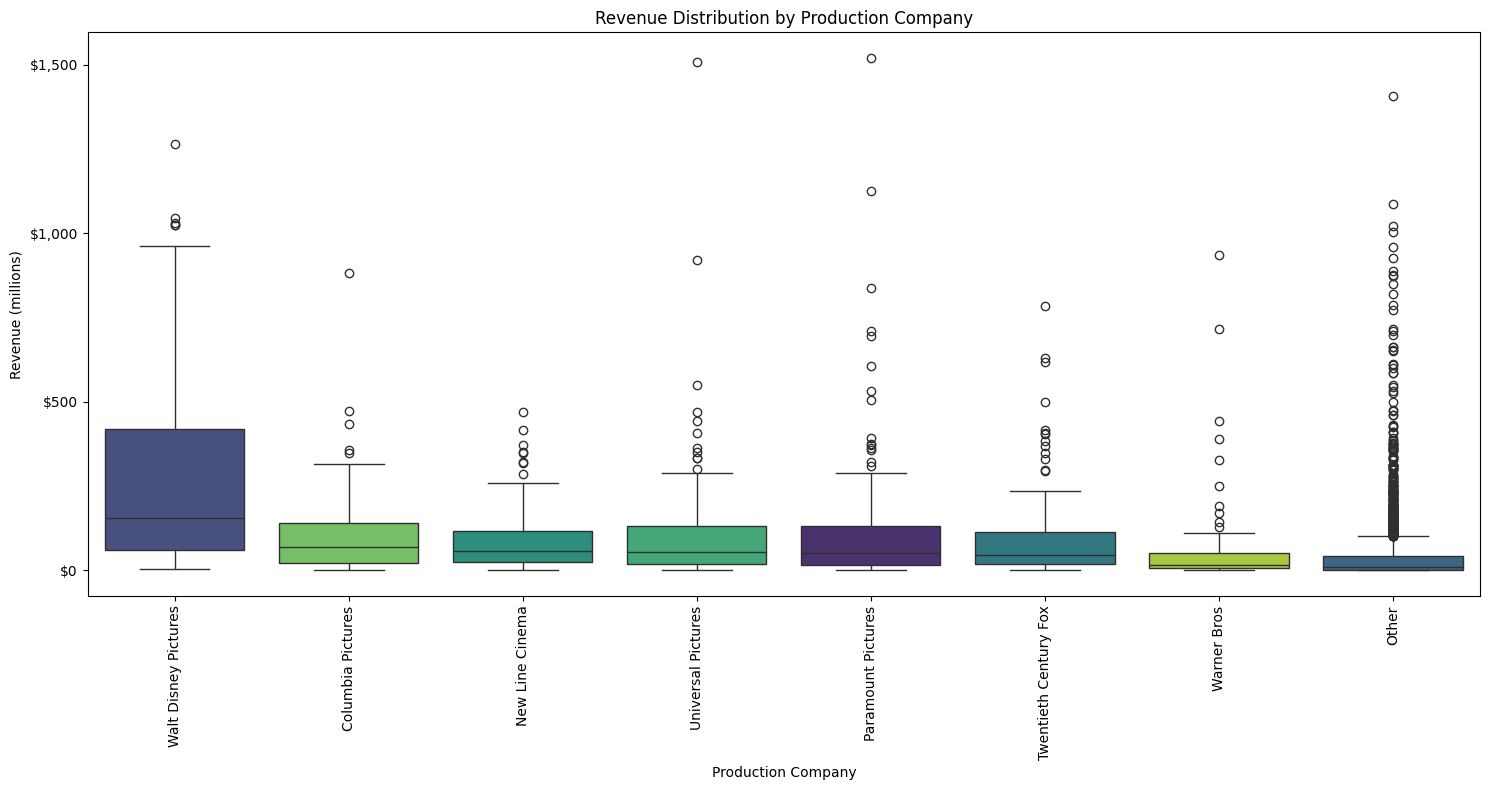

In [82]:
# Calculate the median revenue for each production company
prod_comp_revenue = train.groupby('main_prod_comp')['revenue'].median().reset_index()

# Sort the production companies by median revenue in descending order
prod_comp_revenue = prod_comp_revenue.sort_values(by='revenue', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.boxplot(data=train, y='revenue', x='main_prod_comp', hue='main_prod_comp', order=prod_comp_revenue['main_prod_comp'], palette='viridis')
plt.ylabel('Revenue (millions)')
plt.xlabel('Production Company')
plt.title('Revenue Distribution by Production Company')
plt.yticks(np.arange(0, 1600000000, step=500000000), [f'${int(x//1000000):,}' for x in np.arange(0, 1600000000, step=500000000)])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

For most of the *top* production companies the average revenue is much higher than for the others.

In the next step I will use one-hot encoding in order to make this information useable for the training of the model.

In [83]:
# Get the unique production companies
unique_prod_comps = train['main_prod_comp'].unique()

# Create binary columns for each production company
for comp in unique_prod_comps:
    column_name = f'prod_comp_{comp.replace(" ", "_").replace(".", "").replace("-", "_")}'
    train[column_name] = train['main_prod_comp'].apply(lambda x: 1 if x == comp else 0)

# Display the first few rows to verify
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,main_prod_comp_id,major_prod_comp,prod_comp_Paramount_Pictures,prod_comp_Walt_Disney_Pictures,prod_comp_Other,prod_comp_Twentieth_Century_Fox,prod_comp_New_Line_Cinema,prod_comp_Universal_Pictures,prod_comp_Columbia_Pictures,prod_comp_Warner_Bros
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,4.0,1,1,0,0,0,0,0,0,0
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2.0,1,0,1,0,0,0,0,0,0
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2266.0,0,0,0,1,0,0,0,0,0
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,0,0,0,1,0,0,0,0,0
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,0,0,0,1,0,0,0,0,0


In [84]:
train.drop(columns=['production_companies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               3000 non-null   int64  
 1   belongs_to_collection            3000 non-null   int64  
 2   budget                           3000 non-null   int64  
 3   genres                           2993 non-null   object 
 4   homepage                         946 non-null    object 
 5   imdb_id                          3000 non-null   object 
 6   original_language                3000 non-null   object 
 7   original_title                   3000 non-null   object 
 8   overview                         2992 non-null   object 
 9   popularity                       3000 non-null   float64
 10  poster_path                      2999 non-null   object 
 11  production_countries             2945 non-null   object 
 12  release_date        

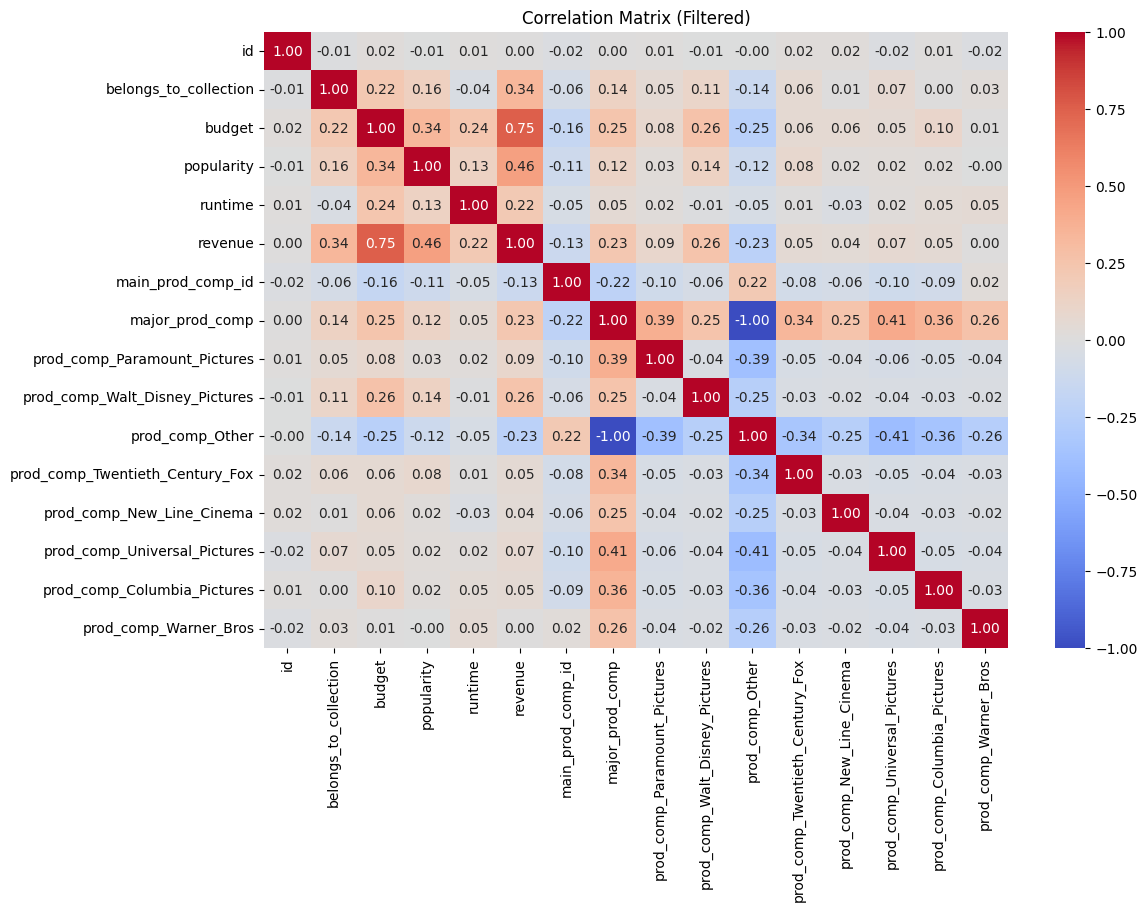

In [85]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Filter the correlation matrix to include only variables with correlation higher than 0.1 with revenue
filtered_corr_matrix = corr_matrix[corr_matrix['revenue'].abs() >= 0]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix (Filtered)')
plt.show()

#### Language

In [86]:
train['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

In [87]:
# Create a new column 'main_language' with the iso_639_1 value of the first index
train['main_language'] = train['spoken_languages'].apply(lambda x: ast.literal_eval(x)[0]['iso_639_1'] if pd.notna(x) and ast.literal_eval(x) else None)

# Correct 'cn' to 'zh'
train['main_language'] = train['main_language'].replace({'cn': 'zh'})

# Count the occurrences of each main language
main_language_counts = train['main_language'].value_counts()

# Print the ordered list
main_language_counts.head(10)

main_language
en    2375
fr      83
es      60
ru      57
de      55
zh      48
ja      42
hi      41
it      27
ar      21
Name: count, dtype: int64

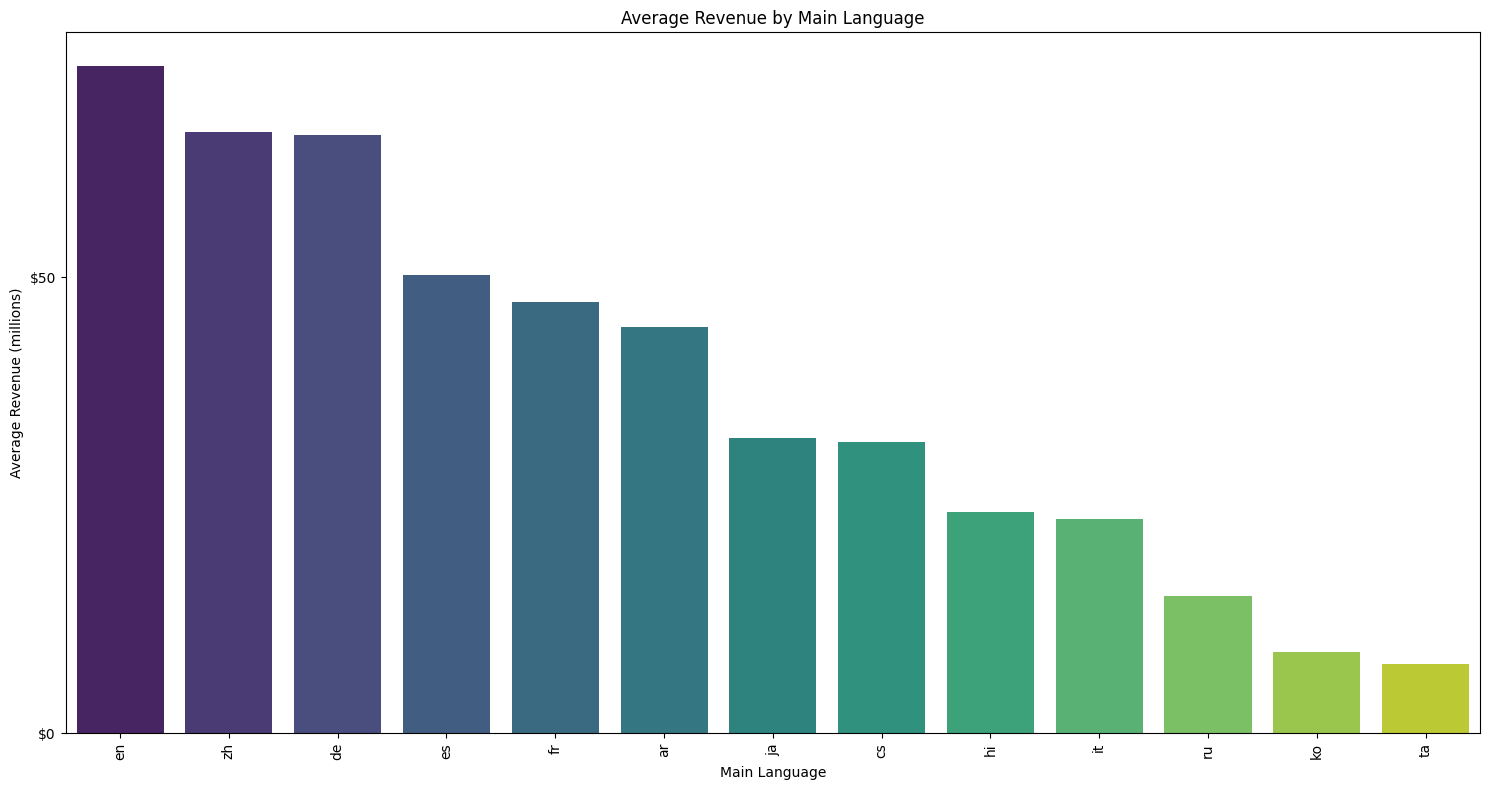

In [88]:
# Filter main languages with more than 10 appearances
valid_languages = main_language_counts[main_language_counts > 10].index

# Filter the train dataframe to include only valid languages
filtered_train = train[train['main_language'].isin(valid_languages)]

# Calculate the average revenue for each main language
language_revenue = filtered_train.groupby('main_language')['revenue'].mean().reset_index()

# Sort the languages by average revenue in descending order
language_revenue = language_revenue.sort_values(by='revenue', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(data=language_revenue, y='revenue', x='main_language', hue='main_language', palette='viridis')
plt.ylabel('Average Revenue (millions)')
plt.xlabel('Main Language')
plt.title('Average Revenue by Main Language')
plt.yticks(np.arange(0, language_revenue['revenue'].max(), step=50000000), [f'${int(x//1000000):,}' for x in np.arange(0, language_revenue['revenue'].max(), step=50000000)])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The three languages with the highest average revenue and Korean will receive an own binary column, the rest will get the value `Other`. 

In [89]:
# Reassign the values in main_language
train['main_language'] = train['main_language'].apply(lambda x: x if x in ['en', 'zh', 'de', 'ko'] else 'Other')

# Display the updated main_language counts to verify
train['main_language'].value_counts()

# Create binary columns for each language in main_language
for lang in ['en', 'zh', 'de', 'ko', 'Other']:
    column_name = f'lang_{lang}'
    train[column_name] = train['main_language'].apply(lambda x: 1 if x == lang else 0)

# Display the first few rows to verify
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,prod_comp_New_Line_Cinema,prod_comp_Universal_Pictures,prod_comp_Columbia_Pictures,prod_comp_Warner_Bros,main_language,lang_en,lang_zh,lang_de,lang_ko,lang_Other
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,en,1,0,0,0,0
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,en,1,0,0,0,0
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,en,1,0,0,0,0
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,en,1,0,0,0,0
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,ko,0,0,0,1,0


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               3000 non-null   int64  
 1   belongs_to_collection            3000 non-null   int64  
 2   budget                           3000 non-null   int64  
 3   genres                           2993 non-null   object 
 4   homepage                         946 non-null    object 
 5   imdb_id                          3000 non-null   object 
 6   original_language                3000 non-null   object 
 7   original_title                   3000 non-null   object 
 8   overview                         2992 non-null   object 
 9   popularity                       3000 non-null   float64
 10  poster_path                      2999 non-null   object 
 11  production_countries             2945 non-null   object 
 12  release_date        

#### Release Date

In [91]:
import pandas as pd
from datetime import datetime

# Assuming your dataset is named 'train' and the release date column is 'release_date'
# First, convert the 'release_date' column to datetime format
train['release_date_mod'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')

# Extract year
train['year_released'] = train['release_date_mod'].dt.year

# Extract quarter
train['quarter_released'] = train['release_date_mod'].dt.quarter

# Extract month (full name)
train['month_released'] = train['release_date_mod'].dt.strftime('%B')

# Extract week number
train['week_released'] = train['release_date_mod'].dt.isocalendar().week

# Extract weekday (full name)
train['weekday_released'] = train['release_date_mod'].dt.strftime('%A')

# Display the first few rows to verify
print(train[['release_date', 'year_released', 'quarter_released', 'month_released', 'week_released', 'weekday_released']].head())

  release_date  year_released  quarter_released month_released  week_released  \
0      2/20/15           2015                 1       February              8   
1       8/6/04           2004                 3         August             32   
2     10/10/14           2014                 4        October             41   
3       3/9/12           2012                 1          March             10   
4       2/5/09           2009                 1       February              6   

  weekday_released  
0           Friday  
1           Friday  
2           Friday  
3           Friday  
4         Thursday  


In [92]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# # TODO: Fix plots

# # Year released
# plt.figure(figsize=(9, 6))
# sns.scatterplot(data=train, x='year_released', y='revenue', hue='year_released', palette='viridis')
# sns.regplot(data=train, x='year_released', y='revenue', scatter=False, color='red')
# plt.title('Revenue by year released')
# plt.xlabel('Release year')
# plt.ylabel('Revenue (Millions)')
# plt.yticks([0, 500000000, 1000000000, 1500000000], ['$0', '$500', '$1000', '$1500'])
# plt.legend([],[], frameon=False)
# plt.show()

# # Quarter released
# plt.figure(figsize=(9, 6))
# sns.barplot(data=train, x='quarter_released', y='revenue', estimator=lambda x: pd.Series.median(x), palette='viridis')
# plt.title('Revenue by quarter released')
# plt.xlabel('Release quarter')
# plt.ylabel('Median revenue (Millions)')
# plt.yticks([0, 10000000, 20000000], ['$0', '$10', '$20'])
# plt.xticks(rotation=90)
# plt.legend([],[], frameon=False)
# plt.show()

# # Month released
# plt.figure(figsize=(9, 6))
# sns.barplot(data=train, x='month_released', y='revenue', estimator=lambda x: pd.Series.median(x), palette='viridis')
# plt.title('Median revenue by month released')
# plt.xlabel('Release month')
# plt.ylabel('Median revenue (Millions)')
# plt.yticks([0, 10000000, 20000000, 30000000], ['$0', '$10', '$20', '$30'])
# plt.xticks(rotation=45)
# plt.legend([],[], frameon=False)
# plt.show()

# # Week released
# plt.figure(figsize=(9, 6))
# sns.barplot(data=train, x='week_released', y='revenue', estimator=lambda x: pd.Series.median(x), palette='viridis')
# plt.title('Revenue by week released')
# plt.xlabel('Release week')
# plt.ylabel('Median revenue (Millions)')
# plt.yticks([0, 20000000, 40000000, 60000000], ['$0', '$20', '$40', '$60'])
# plt.xticks(rotation=90)
# plt.legend([],[], frameon=False)
# plt.show()

# # Weekday released
# plt.figure(figsize=(9, 6))
# sns.barplot(data=train, x='weekday_released', y='revenue', estimator=lambda x: pd.Series.median(x), palette='viridis')
# plt.title('Revenue by weekday released')
# plt.xlabel('Release day')
# plt.ylabel('Median revenue (Millions)')
# plt.yticks([0, 10000000, 20000000, 30000000], ['$0', '$10', '$20', '$30'])
# plt.xticks(rotation=45)
# plt.legend([],[], frameon=False)
# plt.show()

# # Create a grid of the plots using Plotly for better interactivity
# fig = px.scatter(train, x='year_released', y='revenue', color='year_released', title='Revenue by year released')
# fig.add_traces(px.line(train, x='year_released', y='revenue', title='Revenue by year released').data)
# fig.update_layout(yaxis=dict(tickvals=[0, 500000000, 1000000000, 1500000000], ticktext=['$0', '$500', '$1000', '$1500']))
# fig.show()

# fig = px.bar(train, x='quarter_released', y='revenue', color='quarter_released', title='Revenue by quarter released', barmode='group', category_orders={'quarter_released': ['1', '2', '3', '4']})
# fig.update_layout(yaxis=dict(tickvals=[0, 10000000, 20000000], ticktext=['$0', '$10', '$20']))
# fig.show()

# fig = px.bar(train, x='month_released', y='revenue', color='month_released', title='Median revenue by month released', barmode='group', category_orders={'month_released': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']})
# fig.update_layout(yaxis=dict(tickvals=[0, 10000000, 20000000, 30000000], ticktext=['$0', '$10', '$20', '$30']))
# fig.show()

# fig = px.bar(train, x='week_released', y='revenue', color='week_released', title='Revenue by week released', barmode='group')
# fig.update_layout(yaxis=dict(tickvals=[0, 20000000, 40000000, 60000000], ticktext=['$0', '$20', '$40', '$60']))
# fig.show()

# fig = px.bar(train, x='weekday_released', y='revenue', color='weekday_released', title='Revenue by weekday released', barmode='group', category_orders={'weekday_released': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})
# fig.update_layout(yaxis=dict(tickvals=[0, 10000000, 20000000, 30000000], ticktext=['$0', '$10', '$20', '$30']))
# fig.show()

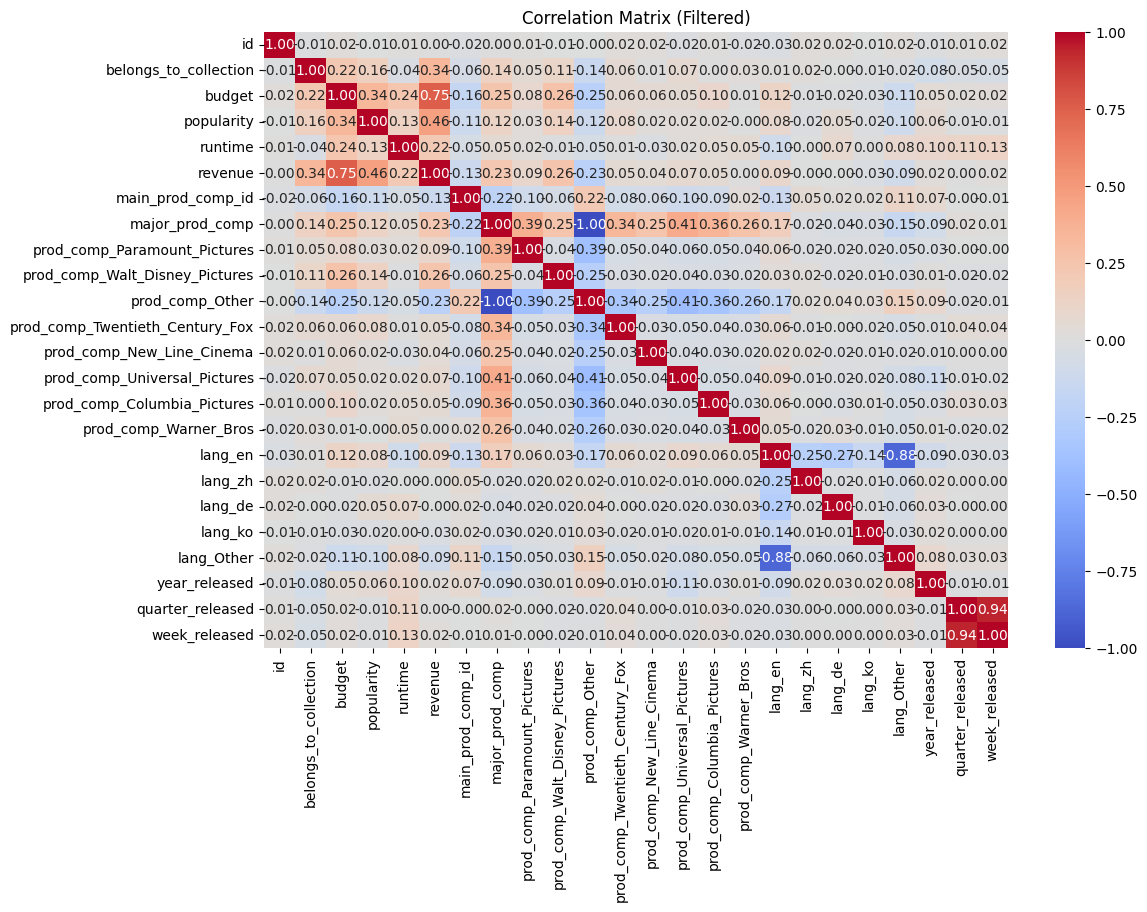

In [93]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Filter the correlation matrix to include only variables with correlation higher than 0.1 with revenue
filtered_corr_matrix = corr_matrix[corr_matrix['revenue'].abs() >= 0]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix (Filtered)')
plt.show()

#### Cast and Crew

In [94]:
print(train['cast'])

0       [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1       [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2       [{'cast_id': 5, 'character': 'Andrew Neimann',...
3       [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4       [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
                              ...                        
2995    [{'cast_id': 2, 'character': 'Rock Reilly', 'c...
2996    [{'cast_id': 5, 'character': 'Bobo', 'credit_i...
2997    [{'cast_id': 10, 'character': 'Samantha Caine ...
2998    [{'cast_id': 8, 'character': 'Reuben Feffer', ...
2999    [{'cast_id': 2, 'character': 'Nathan Harper', ...
Name: cast, Length: 3000, dtype: object


In [95]:
# Total cast count and by gender
train['number_of_cast'] = train['cast'].str.count('name')
train['female_cast'] = train['cast'].str.count(r'gender\'\:\s1')
train['male_cast'] = train['cast'].str.count(r'gender\'\:\s2')
train['unspecified_cast'] = train['cast'].str.count(r'gender\'\:\s0')

# Total crew count and by gender
train['number_of_crew'] = train['crew'].str.count('name')
train['female_crew'] = train['crew'].str.count(r'gender\'\:\s1')
train['male_crew'] = train['crew'].str.count(r'gender\'\:\s2')
train['unspecified_crew'] = train['crew'].str.count(r'gender\'\:\s0')

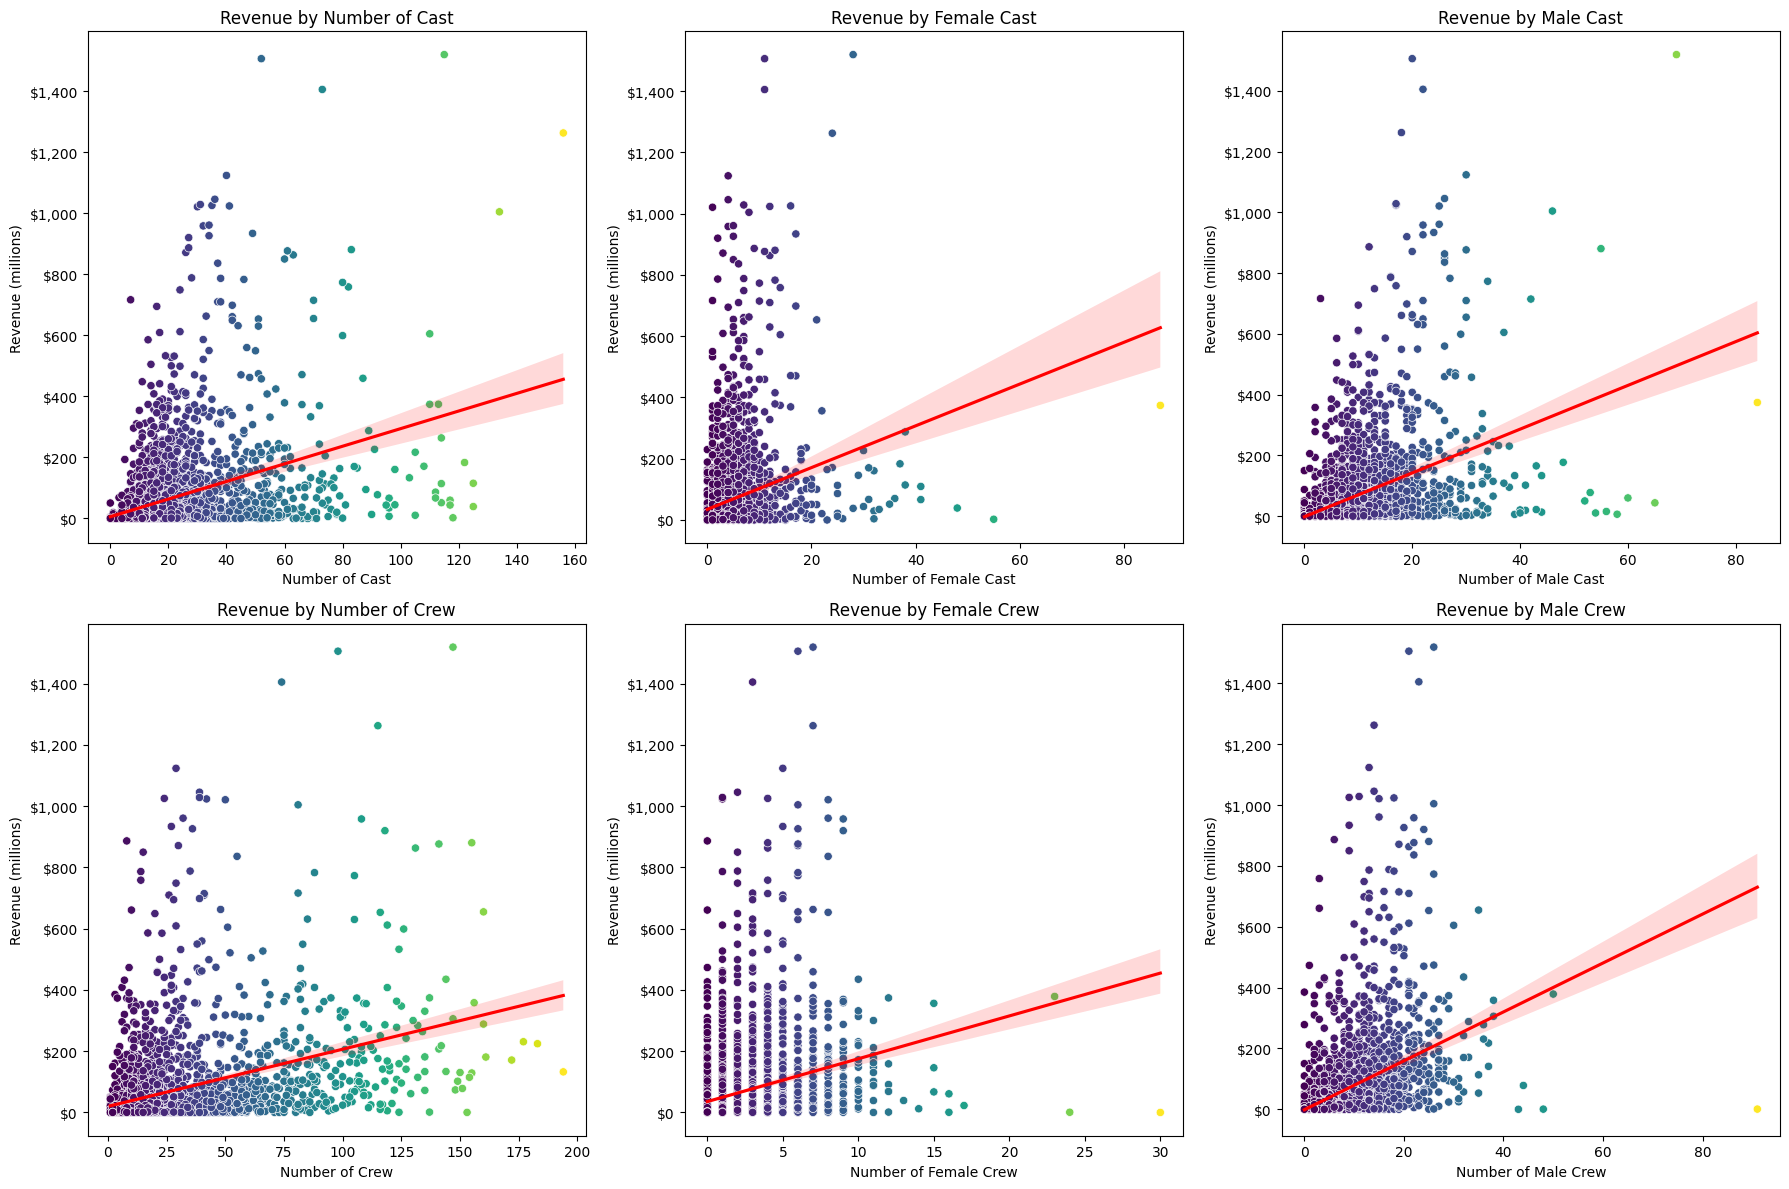

In [96]:
# Create subplots
plt.figure(figsize=(18, 12))

# Number of cast
plt.subplot(2, 3, 1)
sns.scatterplot(data=train, x='number_of_cast', y='revenue', hue='number_of_cast', palette='viridis')
sns.regplot(data=train, x='number_of_cast', y='revenue', scatter=False, color='red')
plt.title('Revenue by Number of Cast')
plt.xlabel('Number of Cast')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

# Female cast
plt.subplot(2, 3, 2)
sns.scatterplot(data=train, x='female_cast', y='revenue', hue='female_cast', palette='viridis')
sns.regplot(data=train, x='female_cast', y='revenue', scatter=False, color='red')
plt.title('Revenue by Female Cast')
plt.xlabel('Number of Female Cast')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

# Male cast
plt.subplot(2, 3, 3)
sns.scatterplot(data=train, x='male_cast', y='revenue', hue='male_cast', palette='viridis')
sns.regplot(data=train, x='male_cast', y='revenue', scatter=False, color='red')
plt.title('Revenue by Male Cast')
plt.xlabel('Number of Male Cast')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

# Number of crew
plt.subplot(2, 3, 4)
sns.scatterplot(data=train, x='number_of_crew', y='revenue', hue='number_of_crew', palette='viridis')
sns.regplot(data=train, x='number_of_crew', y='revenue', scatter=False, color='red')
plt.title('Revenue by Number of Crew')
plt.xlabel('Number of Crew')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

# Female crew
plt.subplot(2, 3, 5)
sns.scatterplot(data=train, x='female_crew', y='revenue', hue='female_crew', palette='viridis')
sns.regplot(data=train, x='female_crew', y='revenue', scatter=False, color='red')
plt.title('Revenue by Female Crew')
plt.xlabel('Number of Female Crew')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

# Male crew
plt.subplot(2, 3, 6)
sns.scatterplot(data=train, x='male_crew', y='revenue', hue='male_crew', palette='viridis')
sns.regplot(data=train, x='male_crew', y='revenue', scatter=False, color='red')
plt.title('Revenue by Male Crew')
plt.xlabel('Number of Male Crew')
plt.ylabel('Revenue (millions)')
plt.yticks(np.arange(0, 1600000000, 200000000), [f'${x//1000000:,}' for x in np.arange(0, 1600000000, 200000000)])
plt.legend().remove()

plt.tight_layout()
plt.show()

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               3000 non-null   int64         
 1   belongs_to_collection            3000 non-null   int64         
 2   budget                           3000 non-null   int64         
 3   genres                           2993 non-null   object        
 4   homepage                         946 non-null    object        
 5   imdb_id                          3000 non-null   object        
 6   original_language                3000 non-null   object        
 7   original_title                   3000 non-null   object        
 8   overview                         2992 non-null   object        
 9   popularity                       3000 non-null   float64       
 10  poster_path                      2999 non-null   object     

#### Genre

Looking at the dataset 

In [98]:
# Count the number of genres per movie
train['genre_count'] = train['genres'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) else 0)

# Count the number of movies for each genre count
genre_count_distribution = train['genre_count'].value_counts().sort_index()

# Display the distribution
genre_count_distribution

genre_count
0      7
1    593
2    972
3    900
4    393
5    111
6     21
7      3
Name: count, dtype: int64

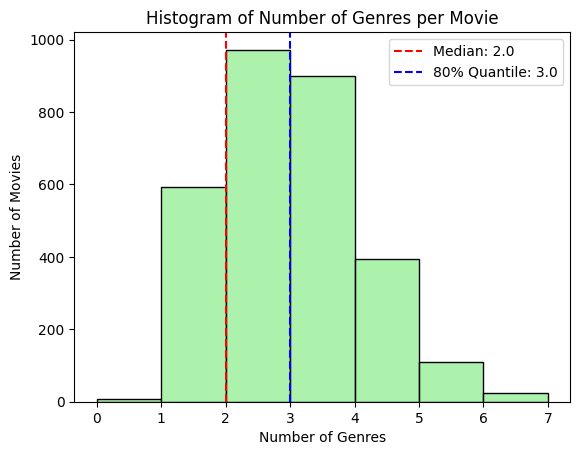

In [99]:
# Calculate the median and 0.8 quantile of genre_count
median_genre_count = train['genre_count'].median()
quantile_80_genre_count = train['genre_count'].quantile(0.80)

# Plot the histogram
sns.histplot(train['genre_count'], bins=range(0, train['genre_count'].max() + 1), kde=False, color='lightgreen')

# Add a vertical line for the median
plt.axvline(median_genre_count, color='red', linestyle='--', label=f'Median: {median_genre_count}')

# Add a vertical line for the 0.8 quantile
plt.axvline(quantile_80_genre_count, color='blue', linestyle='--', label=f'80% Quantile: {quantile_80_genre_count}')

# Add labels and title
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.title('Histogram of Number of Genres per Movie')
plt.legend()

# Show the plot
plt.show()

80% of the samples have either 1, 2 or 3 genres. This might lead to the conclusion that the most significant genres in a list are the first 3. Let's find out which one is the most significant one.

In [100]:
# Function to extract genres
def extract_genres(genres, index):
    try:
        return ast.literal_eval(genres)[index]['name']
    except (IndexError, ValueError, TypeError):
        return None

# Create new columns for the first three genres
train['genre_1'] = train['genres'].apply(lambda x: extract_genres(x, 0))
train['genre_2'] = train['genres'].apply(lambda x: extract_genres(x, 1))
train['genre_3'] = train['genres'].apply(lambda x: extract_genres(x, 2))

# Display the first few rows to verify
train[['genres', 'genre_1', 'genre_2', 'genre_3']].head()

,genres,genre_1,genre_2,genre_3
0,"[{'id': 35, 'name': 'Comedy'}]",Comedy,None,None
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Comedy,Drama,Family
2,"[{'id': 18, 'name': 'Drama'}]",Drama,None,None
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",Thriller,Drama,None
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Action,Thriller,None


In [101]:
# Concatenate the genre columns
all_genres = pd.concat([train['genre_1'], train['genre_2'], train['genre_3']])

# Count the occurrences of each genre
genre_appearances = all_genres.value_counts()

# Display the most occurring genres
print(genre_appearances.head(20))

Drama              1496
Comedy             1005
Action              731
Thriller            609
Romance             493
Crime               422
Adventure           414
Horror              290
Science Fiction     217
Family              208
Fantasy             201
Mystery             178
Animation           138
History             112
Music                88
Documentary          87
War                  75
Western              31
Foreign              25
TV Movie              1
Name: count, dtype: int64


The genres that appear the most are Drama, Comedy, Action and Thriller. Let's see if they are also the ones with the highest revenue.

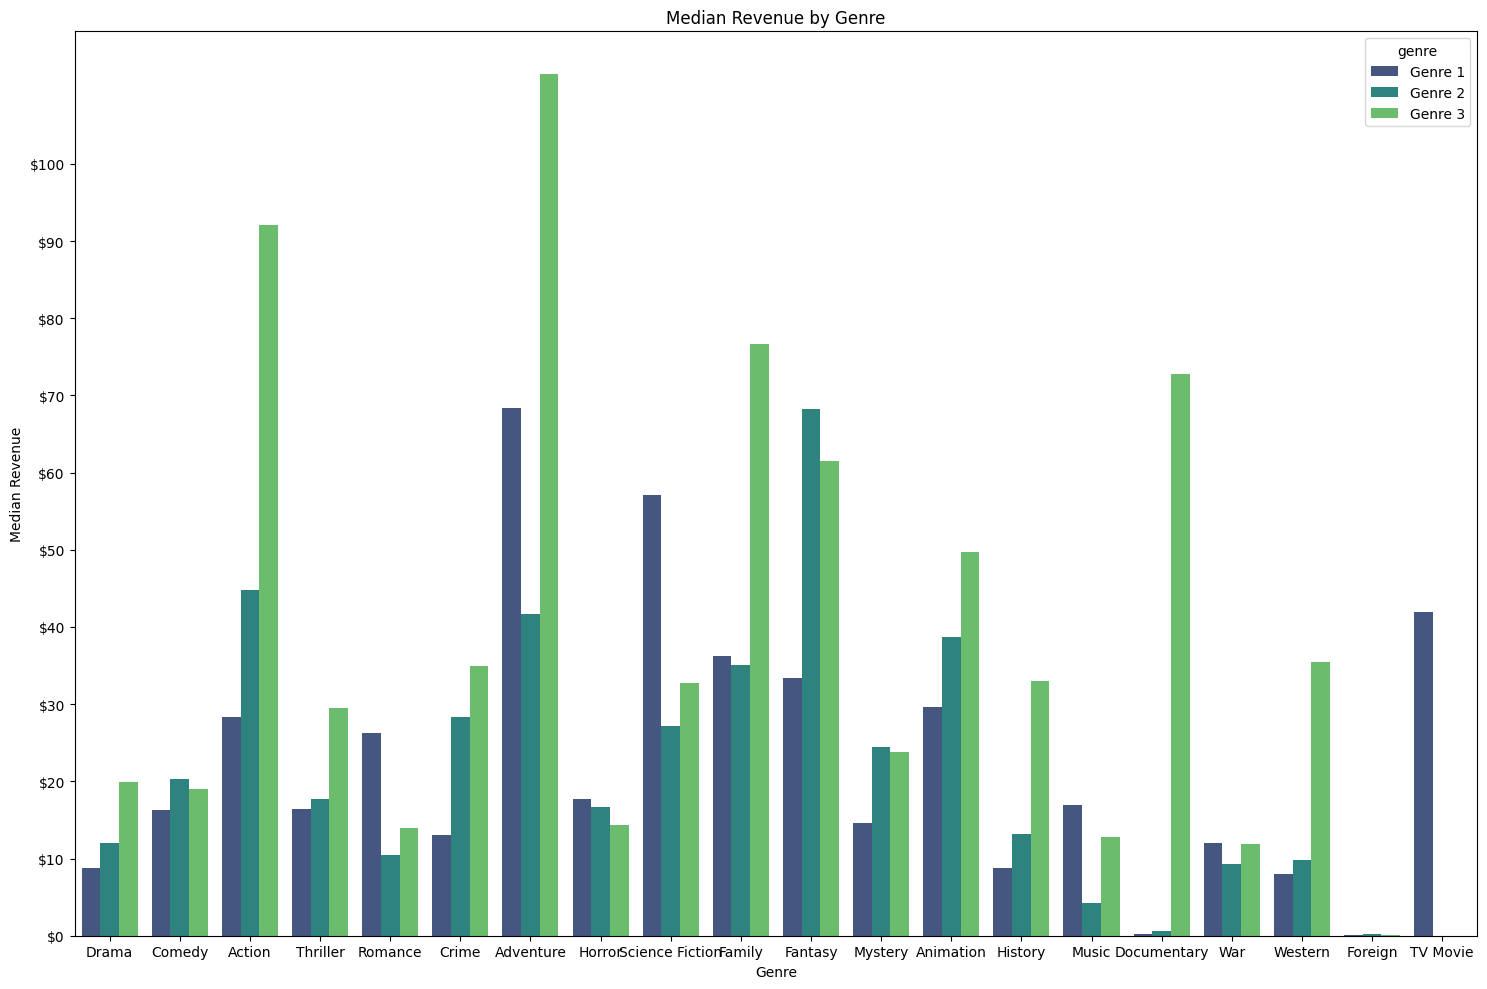

In [102]:
# Calculate the median revenue for each genre
genre_1_median_revenue = train.groupby('genre_1')['revenue'].median().reset_index()
genre_2_median_revenue = train.groupby('genre_2')['revenue'].median().reset_index()
genre_3_median_revenue = train.groupby('genre_3')['revenue'].median().reset_index()

# Combine the three genre median revenue DataFrames
genre_1_median_revenue['genre'] = 'Genre 1'
genre_2_median_revenue['genre'] = 'Genre 2'
genre_3_median_revenue['genre'] = 'Genre 3'

combined_genre_revenue = pd.concat([
    genre_1_median_revenue.rename(columns={'genre_1': 'genre_name'}),
    genre_2_median_revenue.rename(columns={'genre_2': 'genre_name'}),
    genre_3_median_revenue.rename(columns={'genre_3': 'genre_name'})
])

# Ensure the genres are ordered according to genre_appearances
combined_genre_revenue['genre_name'] = pd.Categorical(
    combined_genre_revenue['genre_name'],
    categories=genre_appearances.index,
    ordered=True
)

# Plot the combined data
plt.figure(figsize=(15, 10))
sns.barplot(data=combined_genre_revenue, y='revenue', x='genre_name', hue='genre', palette='viridis')
plt.ylabel('Median Revenue')
plt.xlabel('Genre')
plt.title('Median Revenue by Genre')
plt.yticks(np.arange(0, 110000000, 10000000), [f'${x//1000000:,}' for x in np.arange(0, 110000000, 10000000)])
plt.tight_layout()
plt.show()


In [103]:
# Calculate the ratio of revenue by budget, handling division by zero
train['revenue_budget_ratio'] = np.where(train['budget'] == 0, np.nan, train['revenue'] / train['budget'])

# Display the first few rows to verify
train[['title', 'revenue', 'budget', 'revenue_budget_ratio']].head()

,title,revenue,budget,revenue_budget_ratio
0,Hot Tub Time Machine 2,12314651,14000000,0.879618
1,The Princess Diaries 2: Royal Engagement,95149435,40000000,2.378736
2,Whiplash,13092000,3300000,3.967273
3,Kahaani,16000000,1200000,13.333333
4,Marine Boy,3923970,0,NaN


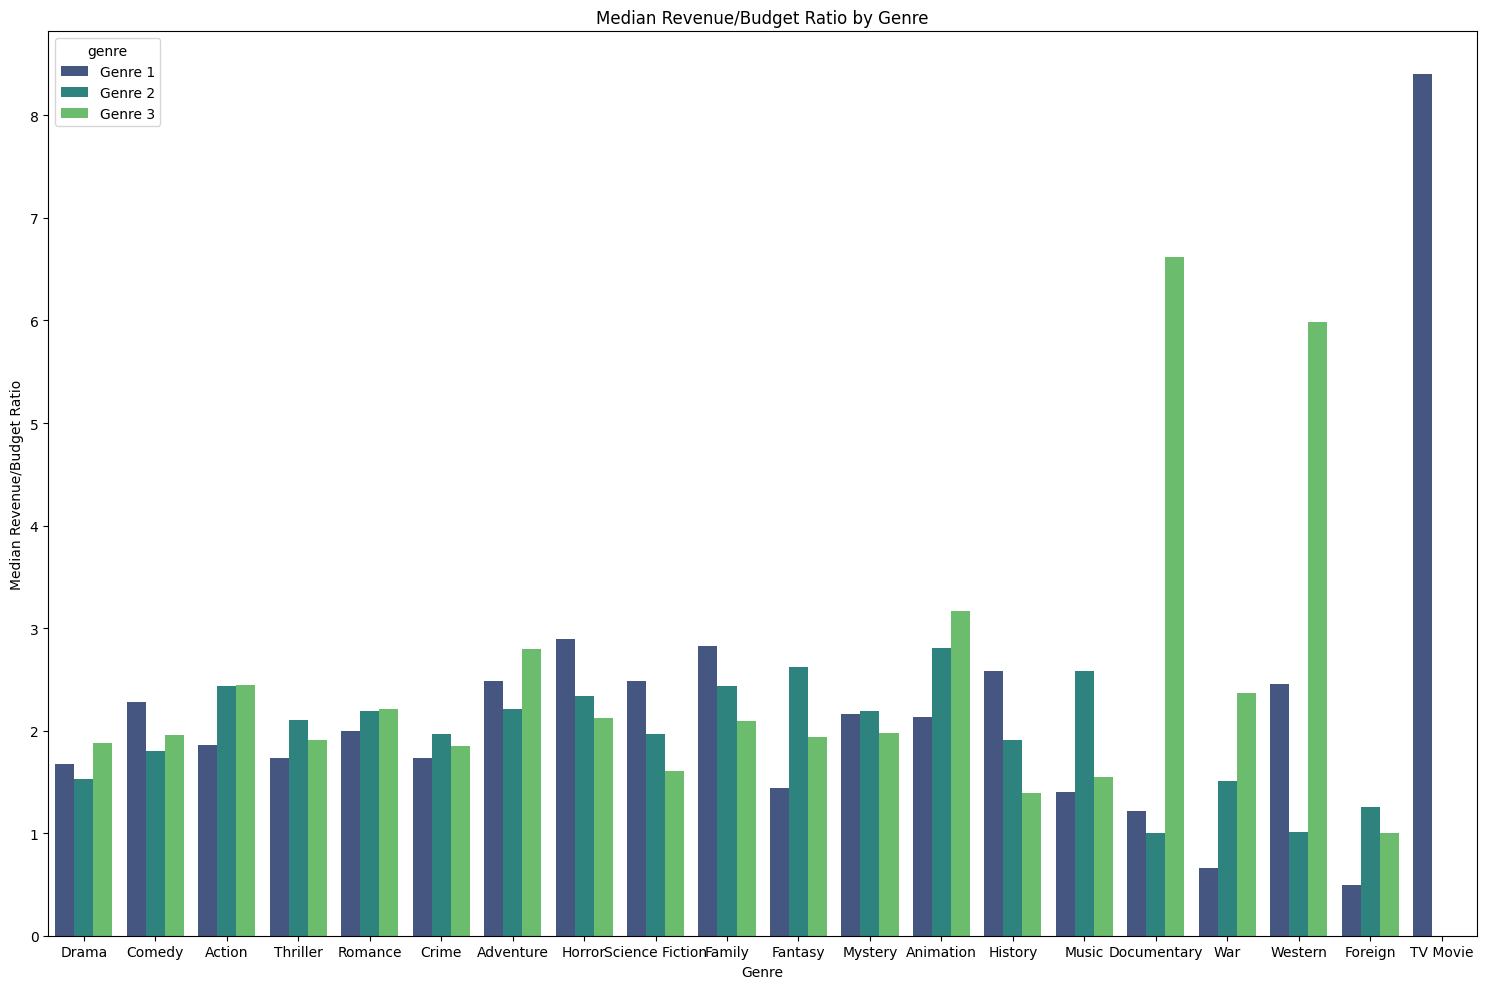

In [104]:
# Calculate the median revenue_budget_ratio for each genre
genre_1_median_ratio = train.groupby('genre_1')['revenue_budget_ratio'].median().reset_index()
genre_2_median_ratio = train.groupby('genre_2')['revenue_budget_ratio'].median().reset_index()
genre_3_median_ratio = train.groupby('genre_3')['revenue_budget_ratio'].median().reset_index()

# Combine the three genre median revenue_budget_ratio DataFrames
genre_1_median_ratio['genre'] = 'Genre 1'
genre_2_median_ratio['genre'] = 'Genre 2'
genre_3_median_ratio['genre'] = 'Genre 3'

combined_genre_ratio = pd.concat([
    genre_1_median_ratio.rename(columns={'genre_1': 'genre_name'}),
    genre_2_median_ratio.rename(columns={'genre_2': 'genre_name'}),
    genre_3_median_ratio.rename(columns={'genre_3': 'genre_name'})
])

# Ensure the genres are ordered according to genre_appearances
combined_genre_ratio['genre_name'] = pd.Categorical(
    combined_genre_ratio['genre_name'],
    categories=genre_appearances.index,
    ordered=True
)

# Plot the combined data
plt.figure(figsize=(15, 10))
sns.barplot(data=combined_genre_ratio, y='revenue_budget_ratio', x='genre_name', hue='genre', palette='viridis')
plt.ylabel('Median Revenue/Budget Ratio')
plt.xlabel('Genre')
plt.title('Median Revenue/Budget Ratio by Genre')
plt.tight_layout()
plt.show()

Based on this graph one could think that

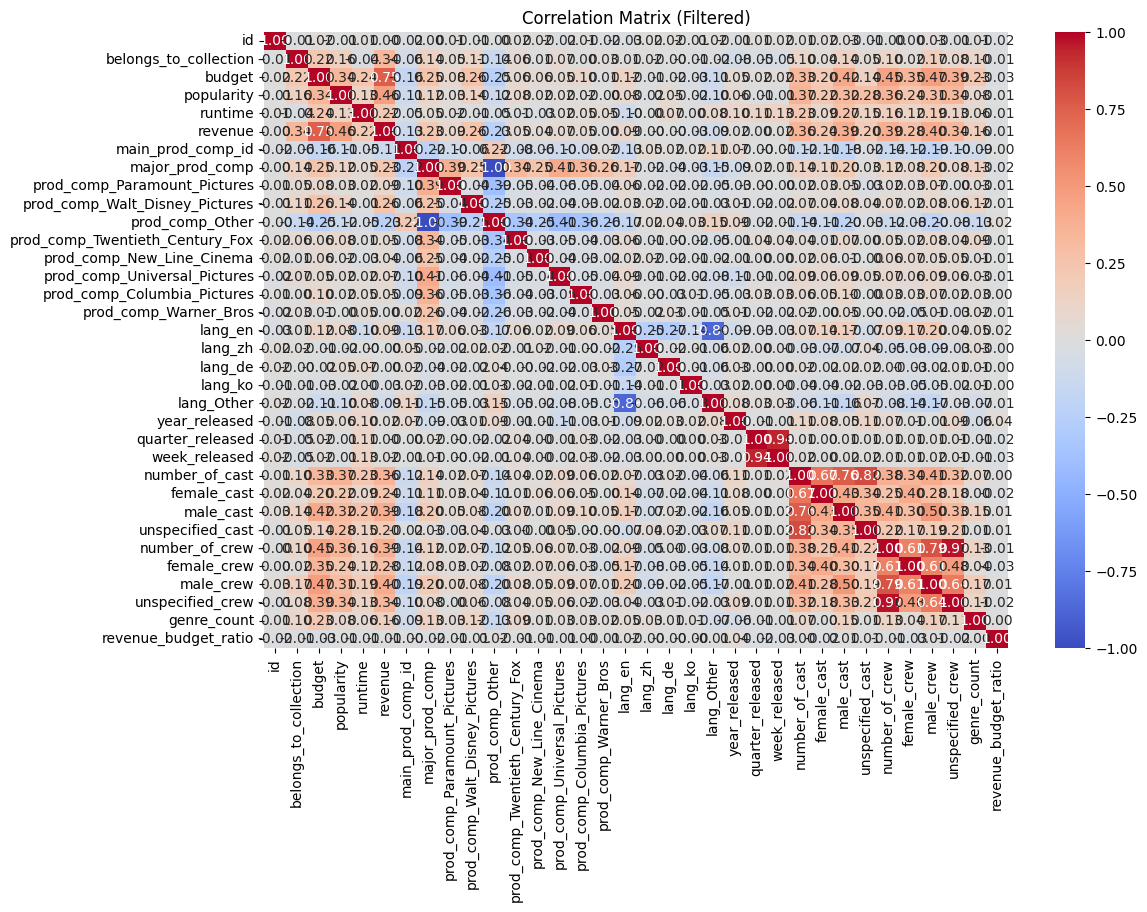

In [105]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Filter the correlation matrix to include only variables with correlation higher than 0.1 with revenue
filtered_corr_matrix = corr_matrix[corr_matrix['revenue'].abs() >= 0]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix (Filtered)')
plt.show()

# 3. Univariate Regression

In [106]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Ensure numeric_cols and train are defined
# Assuming numeric_cols and train are already defined in previous cells

# Initialize an empty list to store the results
results = []

# Loop through each numeric column
for col in numeric_cols.columns:
    if col != 'revenue':  # Skip the target variable
        X = train[[col]].fillna(train[[col]].median()).astype(float)
        y = train['revenue'].astype(float)
        
        # Add a constant to the model (intercept)
        X = sm.add_constant(X)
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
        
        # Fit the model
        model = sm.OLS(y_train, X_train).fit()
        
        # Get the p-value and coefficient estimate
        p_value = model.pvalues.iloc[1]  # p-value for the feature
        coef = model.params.iloc[1]  # coefficient estimate for the feature
        
        # Calculate the R squared value
        r2 = model.rsquared
        
        # Append the result to the list
        results.append({'Variable': col, 'R_squared': r2, 'P_value': p_value, 'Coefficient': coef})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Format the values to a uniform human-readable number
results_df['R_squared'] = results_df['R_squared'].apply(lambda x: f'{x:.4f}')
results_df['P_value'] = results_df['P_value'].apply(lambda x: f'{x:.6f}')
results_df['Coefficient'] = results_df['Coefficient'].apply(lambda x: f'{x:,.2f}')

# Sort the DataFrame by R squared in descending order
results_df = results_df.sort_values(by='R_squared', ascending=False)

# Display the results
print(results_df)


                           Variable R_squared   P_value     Coefficient
2                            budget    0.5826  0.000000            2.88
3                        popularity    0.2157  0.000000    5,476,470.43
29                        male_crew    0.1508  0.000000    8,180,963.43
27                   number_of_crew    0.1400  0.000000    1,916,800.05
25                        male_cast    0.1357  0.000000    7,001,620.76
23                   number_of_cast    0.1268  0.000000    3,025,894.37
1             belongs_to_collection    0.1109  0.000000  117,860,864.13
30                 unspecified_crew    0.1081  0.000000    2,191,193.63
28                      female_crew    0.0738  0.000000   14,232,385.86
8    prod_comp_Walt_Disney_Pictures    0.0696  0.000000  261,891,728.13
24                      female_cast    0.0571  0.000000    7,308,557.74
4                           runtime    0.0518  0.000000    1,476,248.56
9                   prod_comp_Other    0.0508  0.000000  -72,755

# 4. Multivariate Regression

# 5. Benchmark Linear Regression

In [107]:
# Select features and target variable
prod_comps = [
    'prod_comp_Paramount_Pictures',
    'prod_comp_Walt_Disney_Pictures',
    'prod_comp_Other',
    'prod_comp_Twentieth_Century_Fox',
    'prod_comp_New_Line_Cinema',
    'prod_comp_Universal_Pictures',
    'prod_comp_Columbia_Pictures',
    'prod_comp_Warner_Bros'
]

languages = ['lang_en', 'lang_zh', 'lang_de', 'lang_ko', 'lang_Other']

cast = ['number_of_cast', 'female_cast', 'male_cast', 'number_of_crew','female_crew','male_crew']

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['budget', 'popularity', 'male_cast', 'belongs_to_collection', 'major_prod_comp', 'runtime']

X = train[features]

# Fill missing values with the median of each column
X = X.fillna(X.median())

y = train['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = np.mean(np.abs(y_test - y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R^2 Score: {r2}")

R^2 Score: 0.606898572657311


**R^2:** The proportion of the variance in the dependent variable that is predictable from the independent variables.

# 6. Machine Learning Algorithms 

## Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

X = train.select_dtypes(include=[np.number]).drop(columns=['revenue', 'revenue_budget_ratio']).copy()

# Fill missing values with the median of each column
X = X.fillna(X.median())

y = train['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(max_features=12, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Define the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(rf_model, X, y, cv=kf)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5737326142193093.0
Root Mean Squared Error: 75745139.39648598
R^2 Score: 0.6965796191293631


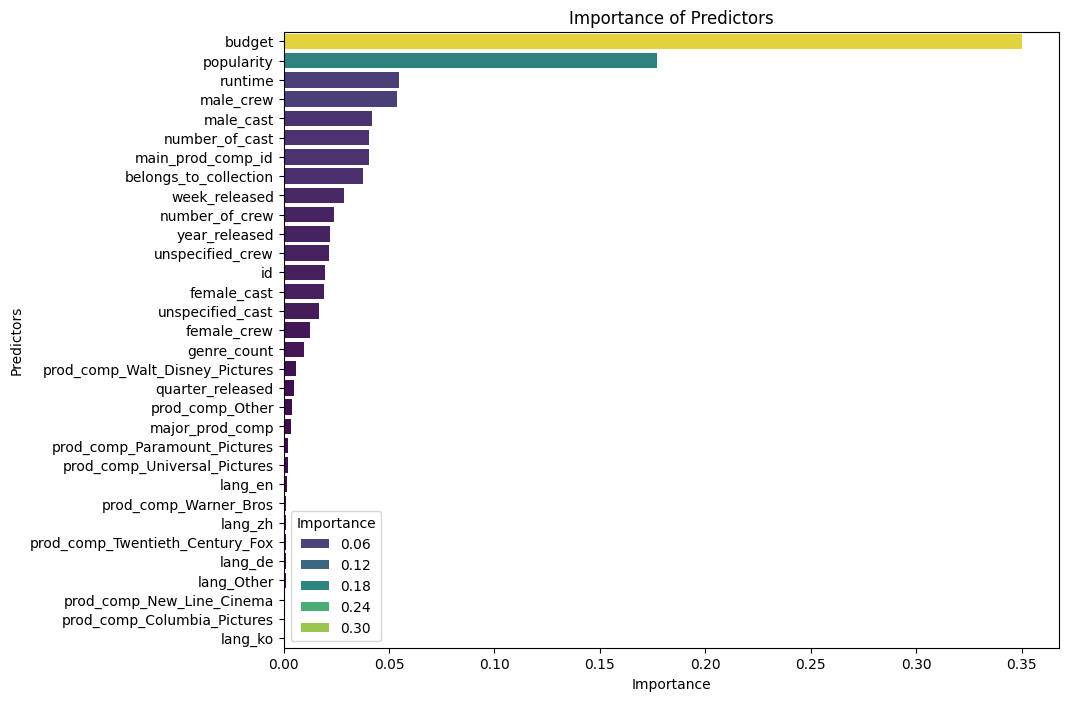

In [110]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Variables': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Variables', data=feature_importance_df, hue='Importance', palette='viridis')
plt.title('Importance of Predictors')
plt.xlabel('Importance')
plt.ylabel('Predictors')
plt.show()

## Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(max_features=12, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(gb_model, X, y, cv=kf)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.6902620517289808


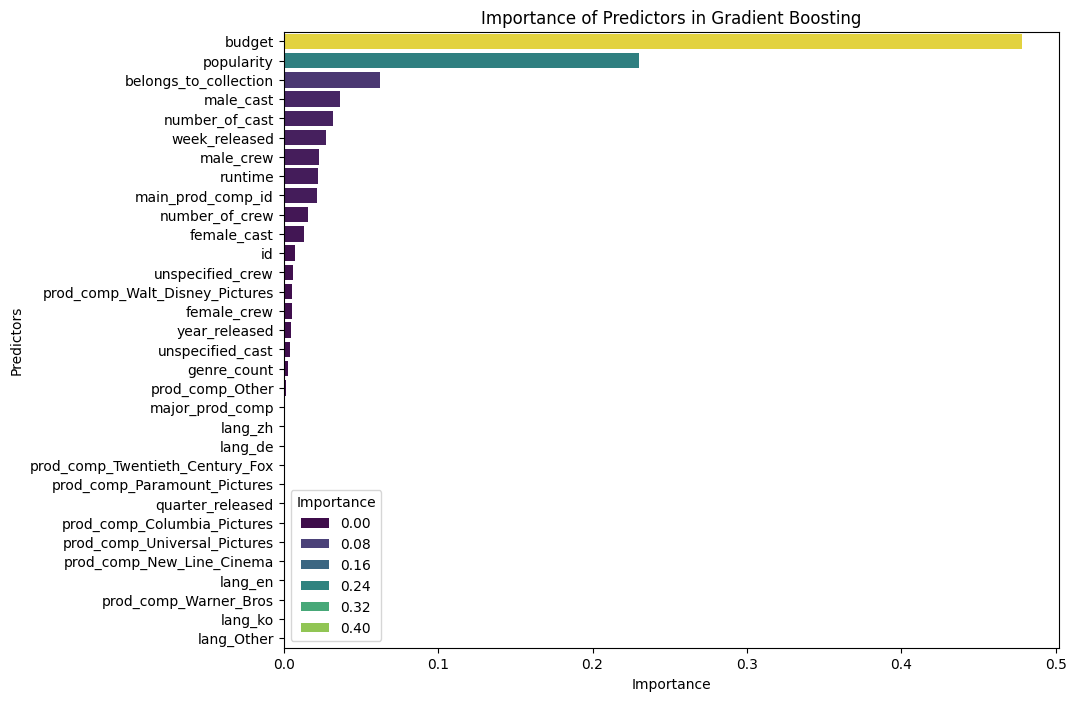

In [112]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get feature importances from the gradient boosting model
importances = gb_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Variables': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Variables', data=feature_importance_df, hue='Importance', palette='viridis')
plt.title('Importance of Predictors in Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Predictors')
plt.show()

What is univariate analysis and meta analysis?
- works mostly for numerical values
  - Run regression for each numerical X
  - Write every R^2 in a table and compare
  - Standardize the values if they deviate to much

# 7. K-Fold Cross-Validation

# 8. Performance Evaluation

# 9. Key Fetures

# 10. Synthetic Interpretation of Results